<div align="center">
<h1>Deep learning Practical Assignment 1:
<h6>Linear Classifier : Perceptron
<h4>Lab date : October 10th, 2021
<h4>Deadline to submit : October 25th, 2021 - 11:59 PM (23:59)   
</div>
<h3>Group Members: <ul>
    <li> Ahmed Belaaj
    <li> Omar Chaabouni
    <li> Linna Azaiez
    </ul> 

## Theoretical Questions :

### Question 1.a
What is the computational/time complexity of the basic perceptron algorithm ?

====> O(n*m)

### Question 1.b
What is the space complexity of the basic perceptron algorithm ?

====> O(m)

## Installing required packages :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Practical Questions

In [2]:
def prepare_data( var ):
#     x = np.concatenate ( (mu_1 + np.random.randn(125 , 2)  * sigma_1 , mu_2 + np.random.randn(125 , 2)  * sigma_2 ) , axis = 0 ) 
    mean1= [-1 , 0]
    mean2= [1 , 0]
    cov = var * np.eye(2) 
    x = np.concatenate( (np.random.multivariate_normal(mean1, cov, 125) , np.random.multivariate_normal(mean2, cov, 125))  )
    y = np.concatenate((np.ones(125),-1*np.ones(125)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle = True )
    return x_train, x_test, y_train, y_test

In [3]:
def perceptron(x , y , n=500):
    converged = False
    w = np.zeros(x.shape[1])
    w_next = np.zeros(x.shape[1])
    for t in range(n):
        for i in range(x.shape[0]):
            if y[i]* np.dot(x[i,:],w) <= 0:
                w = w_next
                w_next = w + y[i]*x[i,:] 
        if np.allclose(w , w_next):
            converged = True
            return converged, w
    return converged, w_next

In [4]:
def predict(x, y, w):
    y_pred = np.dot(x,w)
    y_class = np.zeros_like(y_pred)
    y_class[y_pred >= 0] = 1
    y_class[y_pred < 0] = -1

    acc = accuracy_score(y, y_class)
    

    return y_class, acc

In [5]:
def plot_prediction(x, y, w):

    plt.figure()
    y = y.reshape(-1,)
    plt.scatter(x[y == -1][:,0], x[y == -1][:, 1] , label='-1')
    plt.scatter(x[y == 1][:,0], x[y == 1][:, 1], label = '1')

    x_max = max(x[:,0].max(), -x[:,0].min()) 
    y_max = max(x[:,1].max(), -x[:,1].min())
    
    x_boundary = np.linspace(-x_max, x_max, 1000)
    y_boundary = -1 * w[0] / w[1] * x_boundary
    
    
    plt.plot(
        x_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],
        y_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],
        label = 'decision boundary'
    )
    plt.legend()

### Experiment 1 :

In [6]:
var = 0.25

In [7]:
x_train, x_test, y_train, y_test = prepare_data( var ) 

In [8]:
converged , w = perceptron(x_train , y_train )

In [9]:
converged

False

### Question 1 :
#### Does the algorithm converges? Why?
====> In our case, the algorithm doesn't converge although visualisations show that the decision boundary separates perfectly the two classes. That's because we don't get enough chance to update and adjust the weights. This is why there are more efficient and recent versions of the perceptron algorithm.   

In [10]:
w

array([-1.98426888,  0.42227807])

### Question 2 :
#### Plot the decision boundary found by your algorithm.

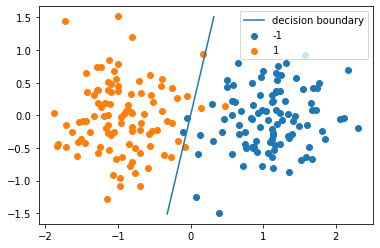

In [11]:
plot_prediction(x_train, y_train, w)

#### Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?
====> No decision boundary is not unique, it depends on the dataset but also on the points choosen when splitting the dataset into train set and test set and the order of the points while training the algorithm.

### Question 3 :
#### Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.

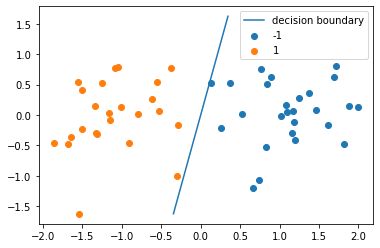

In [12]:
plot_prediction(x_test, y_test, w)

In [13]:
y_class, acc = predict(x_test, y_test, w)

In [14]:
acc

1.0

### Experiment 2 :

In [15]:
var = 0.75

In [16]:
x_train, x_test, y_train, y_test = prepare_data( var ) 

In [17]:
conv , w = perceptron(x_train , y_train )

In [18]:
conv

False

### Question 1 :
#### Does the algorithm converges? Why?
====> In our case, the algorithm doesn't converge because the algorithm keeps wrongly classifing some point and that's because  the points of the two classes overlap since we increased the variance so it's impossible to separate the two classes with a linear boundary decision.

In [19]:
print(w)

[-0.37532892  1.73885103]


### Question 2 :
#### Plot the decision boundary found by your algorithm.

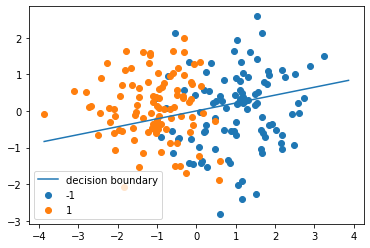

In [20]:
plot_prediction(x_train, y_train, w)

#### Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?
====> No decision boundary is not unique, as we said in the first experiment, it depends on the dataset but also on the points choosen when splitting the dataset into train set and test set and the order of the points while training the algorithm.

### Question 3 :
#### Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.

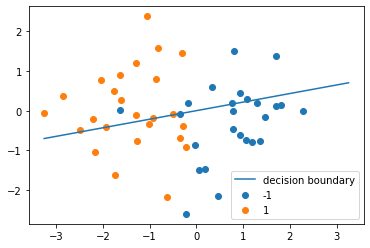

In [21]:
plot_prediction(x_test, y_test, w)

In [22]:
y_class, acc = predict(x_test, y_test, w)

In [23]:
acc

0.66

### Comments:
we notice taht the perceptrion algorithm is useful for simple linear classification problems, the more the datasets are complex , the less it's helpful and accurate.

### Experiment 3 :

In [24]:
variances = [0.01, 0.1, 0.5, 0.7]
nb_experiments = 30

errs_mean = []
errs_variance = []

for var in variances:
    print('var : ', var)
    exp_errs = []

    for _ in range(nb_experiments):
        x_train, x_test, y_train, y_test = prepare_data( var  ) 
        converged , w = perceptron(x_train , y_train , n=500) 
        y_class, acc = predict(x_test, y_test, w)
        err = np.abs(y_test - y_class.reshape(-1,))
        exp_errs.append(np.array(err).mean())
    
    errs_mean.append(np.array(exp_errs).mean())
    errs_variance.append(np.array(exp_errs).std()**2)

var :  0.01
var :  0.1
var :  0.5
var :  0.7


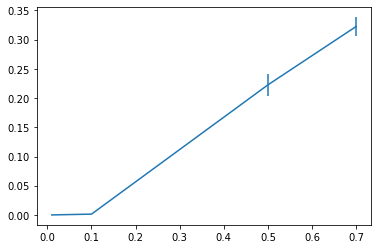

In [25]:
plt.errorbar(variances, errs_mean, errs_variance)
plt.show()

In [26]:
errs_mean

[0.0, 0.0013333333333333333, 0.22266666666666668, 0.32266666666666666]

In [27]:
errs_variance

[0.0, 5.1555555555555576e-05, 0.019166222222222216, 0.01577955555555556]

### Commnet :
It stands to reason that the classification error increases as the distributions overlap because our model can separate the distributions for small cov (0.01, 0.1), err mean = 0 and err variance = 0. But when the model starts producing incorrect classes (for big variances like 0.5 and 0.7), the error mean increases and the variance begins to show since we perform multiple experiments which produces different decision boundaries for each fixed variance.